# Análise Multivariada e Aprendizado Não-Supervisionado

por Sidnei Gazola Junior, n°USP: 9378888

Professora orientadora: Cibele Russo

ICMC USP São Carlos.

Este trabalho visa responder as seguintes questões propostas:

Considere dados demográficos e econômicos de estados brasileiros, disponíveis, por exemplo, em https://www.ibge.gov.br/cidades-e-estados. Considerando dados (multivariados) que achar relevantes, desenvolva cada um dos itens abaixo, usando a linguagem de sua preferência.

1. Desenvolva as análises descritivas e exploratórias para os dados em questão. Interprete brevemente os resultados

2. Obtenha agrupamentos hierárquicos aglomerativos usando o dendrograma e justifique  escolha do número de grupos. Utilize a distância e método de ligação que achar conveniente. Interprete brevemente os resultados

3. Obtenha agrupamentos não-hierárquicos utilizando o algoritmo de K-médias. Interprete brevemente os resultados.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from pandasql import sqldf

## Análises descritivas e exploratórias

In [113]:
data = pd.read_csv("dadoses.csv", index_col=0,decimal= ",")
data.head()

,Área Territorial - km² [2019],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Matrículas no ensino fundamental - matrículas [2018],IDH <span>Índice de desenvolvimento humano</span> [2010],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],Rendimento mensal domiciliar per capita - R$ [2019],Total de veículos - veículos [2018]
UF [-],,,,,,,,,
Acre,164123.964,894470,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831
Alagoas,27843.295,3351543,112.33,490587,0.631,1.195044e+07,1.046063e+07,731,834827
Amapá,142470.762,861773,4.69,136185,0.708,5.396417e+06,4.224464e+06,880,195039
Amazonas,1559167.889,4207714,2.23,705007,0.674,1.732846e+07,1.532490e+07,842,883083
Bahia,564760.427,14930634,24.82,2034711,0.660,5.019100e+07,4.557016e+07,913,4139107


In [114]:
data.describe()

,Área Territorial - km² [2019],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Matrículas no ensino fundamental - matrículas [2018],IDH <span>Índice de desenvolvimento humano</span> [2010],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],Rendimento mensal domiciliar per capita - R$ [2019],Total de veículos - veículos [2018]
count,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,27.000000,2.700000e+01,2.700000e+01,27.000000,2.700000e+01
mean,3.151961e+05,7.842803e+06,68.040741,1.006814e+06,0.704519,3.571354e+07,3.237044e+07,1238.703704,3.731354e+06
std,3.751197e+05,9.316952e+06,105.909690,1.079327e+06,0.049284,4.590409e+07,4.592375e+07,476.693968,5.729603e+06
min,5.760783e+03,6.311810e+05,2.010000,9.658200e+04,0.631000,4.419450e+06,3.384684e+06,636.000000,1.950390e+05
25%,7.609896e+04,2.932272e+06,6.325000,3.908680e+05,0.664000,1.203733e+07,9.875718e+06,901.500000,9.340650e+05
50%,2.236445e+05,4.064052e+06,33.410000,5.562480e+05,0.699000,1.968562e+07,1.762717e+07,1056.000000,1.812473e+06
75%,3.349228e+05,9.401862e+06,71.475000,1.300333e+06,0.737500,3.681568e+07,2.945779e+07,1495.500000,4.024268e+06
max,1.559168e+06,4.628933e+07,444.660000,5.367614e+06,0.824000,2.328225e+08,2.319822e+08,2686.000000,2.905775e+07


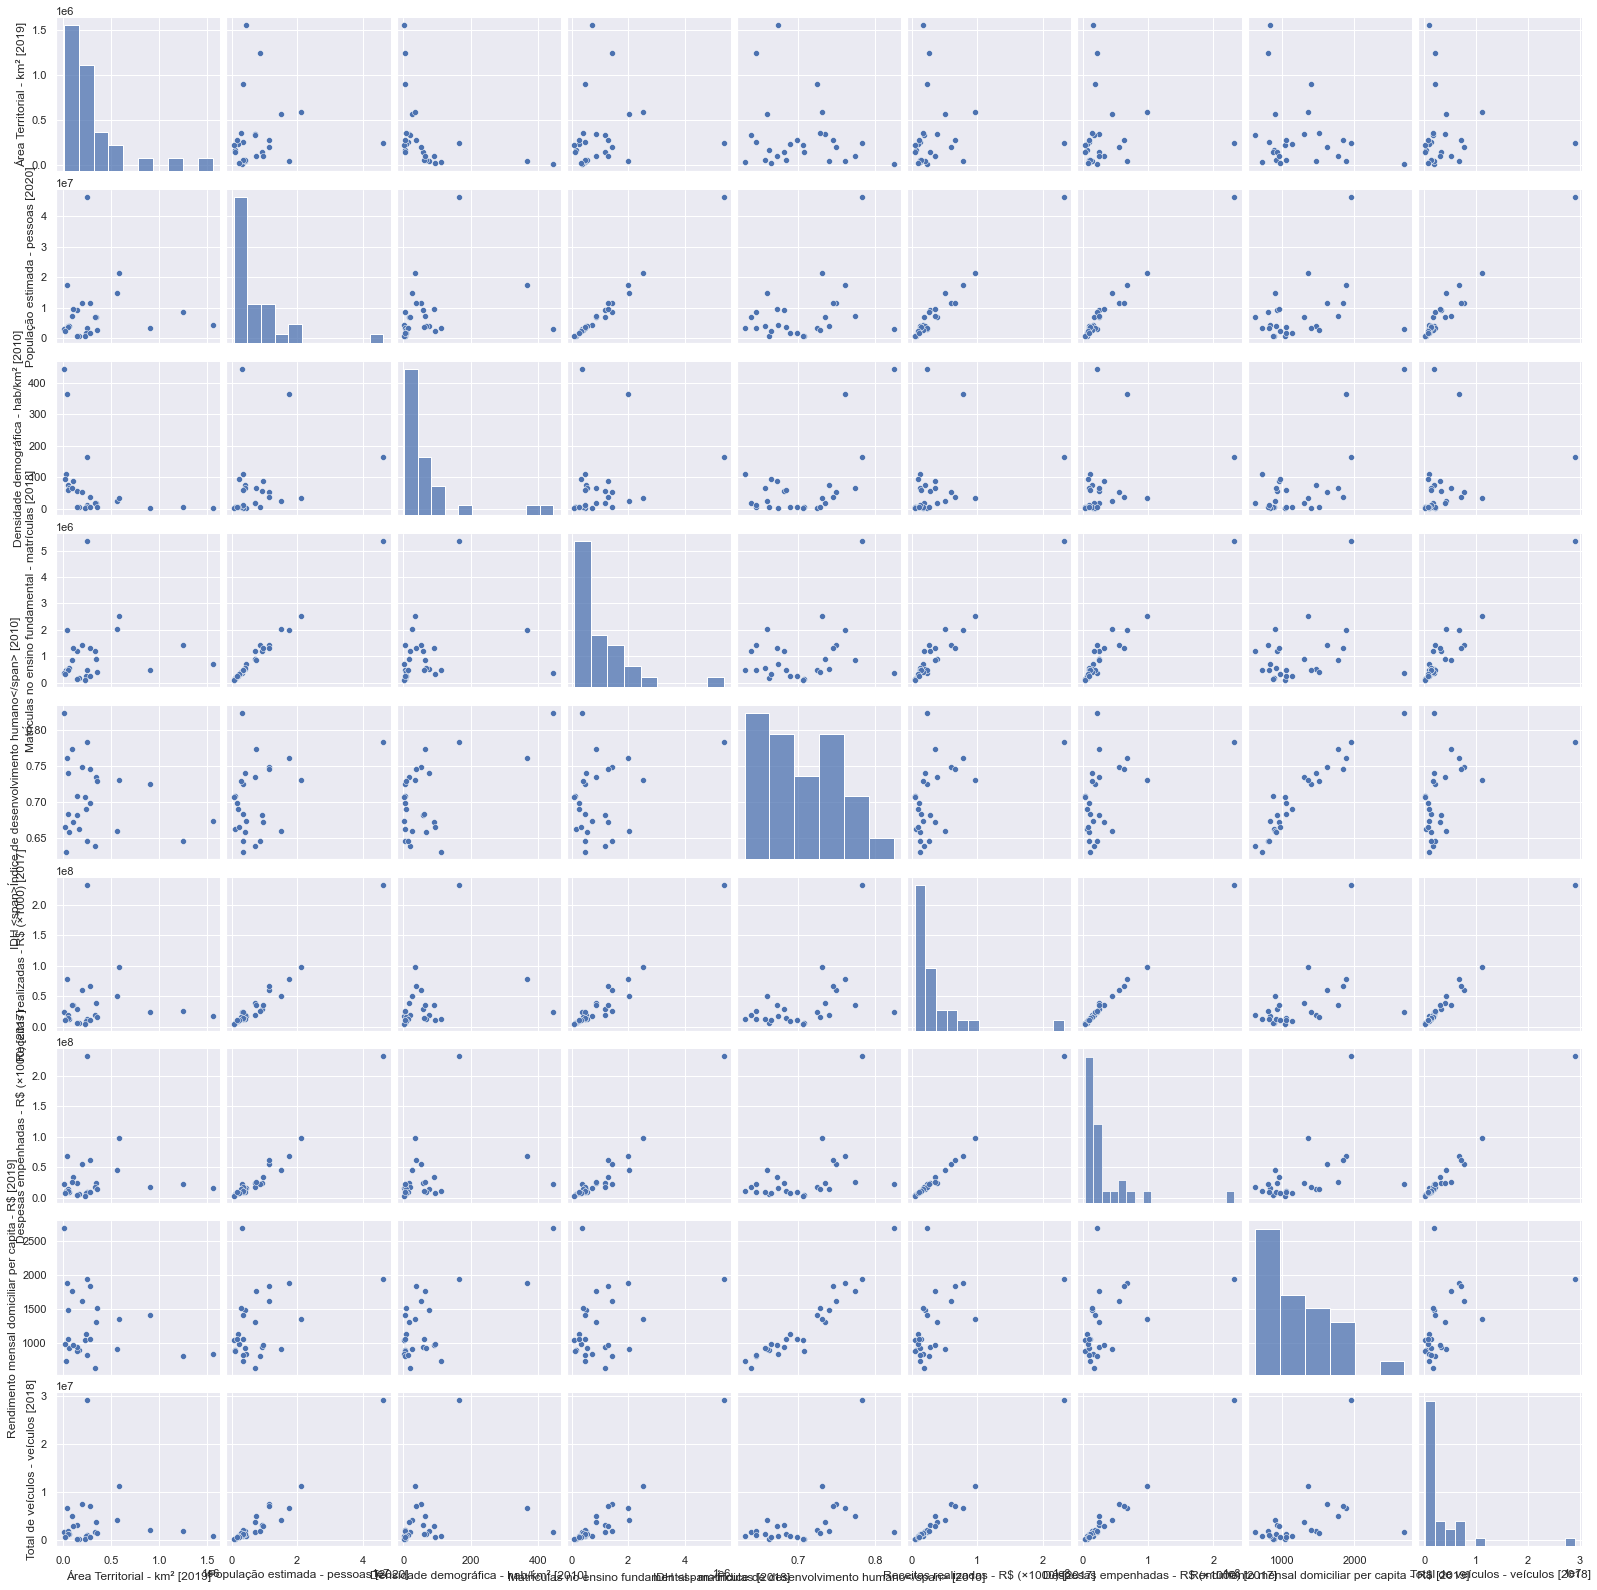

In [115]:
sns.pairplot(data)

<AxesSubplot:>

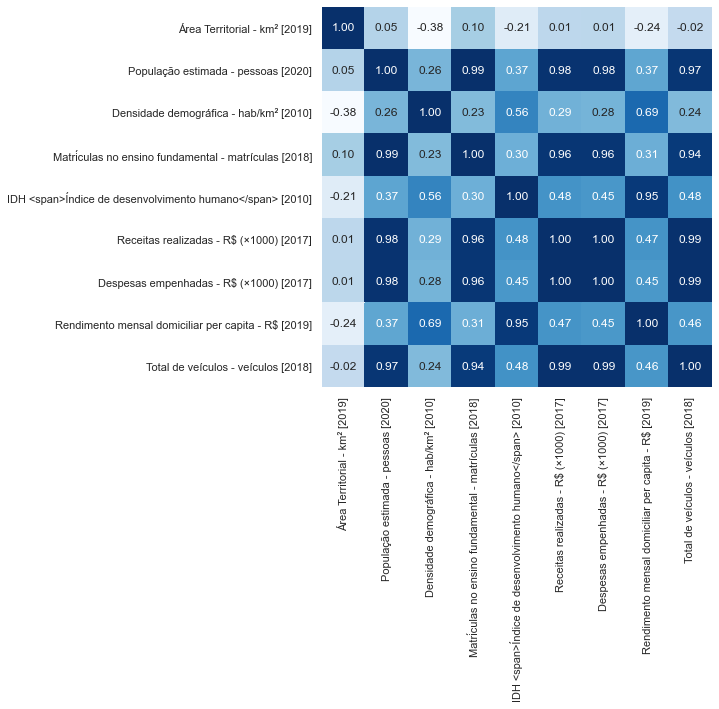

In [116]:
plt.figure(figsize=(7, 7))
corr = np.corrcoef(data.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=df.columns, yticklabels=df.columns)

Com as análises descritivas e exploratórias, podemos perceber que tem algumas colunas que são bem correlacionadas, o que já era esperado, pois são dados economicos então é esperado por exemplo que o IDH seja relacionado com o rendimento familiar per capita.


## Agrupamento hierárquico via dendrograma

In [117]:
data_s = data.copy()
data_s.iloc[:, :] = StandardScaler().fit_transform(data)

data_s.head()

,Área Territorial - km² [2019],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Matrículas no ensino fundamental - matrículas [2018],IDH <span>Índice de desenvolvimento humano</span> [2010],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],Rendimento mensal domiciliar per capita - R$ [2019],Total de veículos - veículos [2018]
UF [-],,,,,,,,,
Acre,-0.410402,-0.759980,-0.611669,-0.801744,-0.858489,-0.645577,-0.583288,-0.745439,-0.614233
Alagoas,-0.780622,-0.491235,0.426146,-0.487397,-1.520160,-0.527530,-0.486179,-1.085340,-0.515167
Amapá,-0.469225,-0.763556,-0.609553,-0.822007,0.071987,-0.673026,-0.624560,-0.766816,-0.628958
Amazonas,3.379371,-0.397591,-0.633222,-0.284952,-0.631039,-0.408140,-0.378241,-0.848051,-0.506585
Bahia,0.677966,0.775237,-0.415864,0.970492,-0.920520,0.321393,0.292902,-0.696271,0.072522


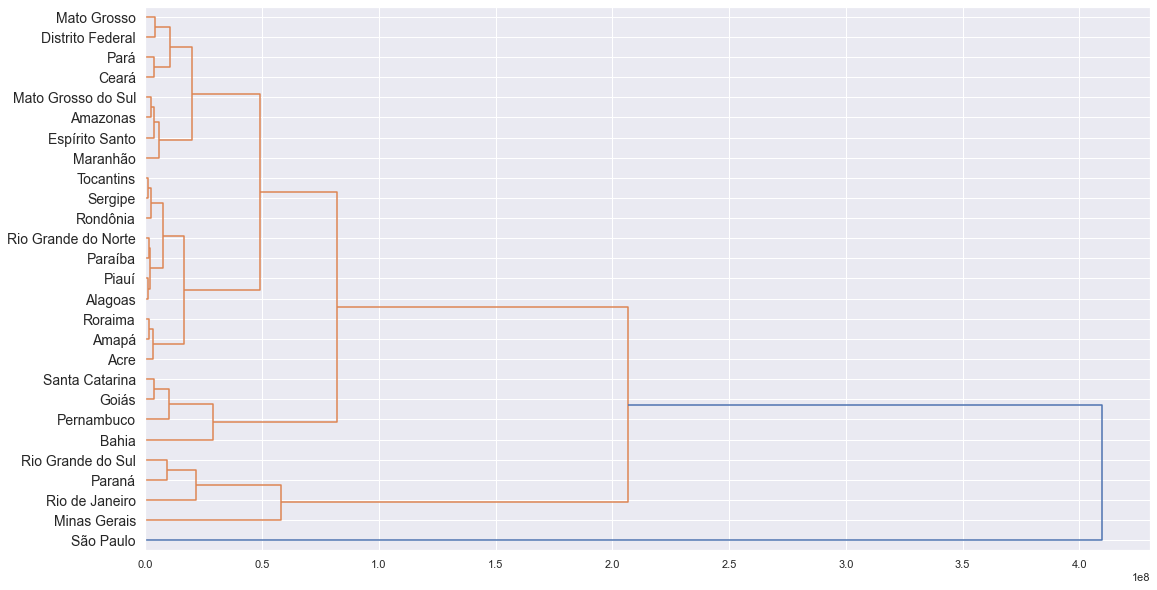

In [118]:
Z = hierarchy.linkage(data, 'ward')
plt.figure(figsize=(18, 10))
dn = hierarchy.dendrogram(Z, labels=list(df_paises.index), leaf_font_size=14,orientation='right')

In [130]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
groups = cluster.fit_predict(data)

estados = list(data.index)
g_estados = {i: [] for i in range(n_clusters)}
for estados, group in zip(countries, groups):
    g_estados[group].append(estado)

for gp, est in g_estados.items():
    print(f'Cluster {gp}: {est}\n')

Cluster 0: ['Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins', 'Tocantins']

Cluster 1: ['Tocantins']

Cluster 2: ['Tocantins', 'Tocantins', 'Tocantins', 'Tocantins']



Para essa análise de agrupamento hierárquica via dendrograma foi utilizado a medida euclidiana para medir a distância e o método de ligação Ward, foi realizado um corte na distância 1 para definir o número de clusters.
Com essa ánalise de cluster podemos notar uma forte relação geográfica com os dados económicos. Sendo os estados mais ao sudeste e sul sendo separados do resto dos outros estados, o que já era esperado pois é a região mais forte economicamente do país. Vale ressaltar que o estado de São Paulo ficou bem distante dos demais, o que também bate com a realidade, pois é o estado com a maior economia do país.

## Agrupamento não-hierárquico (K-médias)

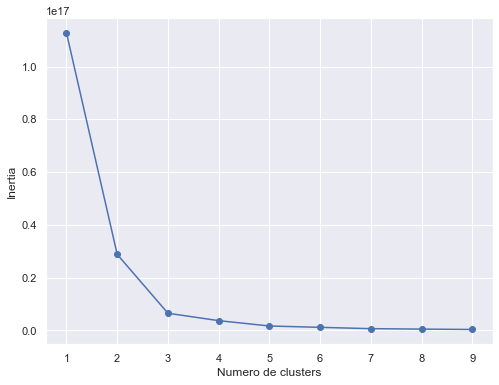

In [122]:
inertias = []
for k in np.arange(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

# Plotando o gráfico do Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 10), inertias, '-o')
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia');

In [123]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
data['cluster'] = kmeans.fit_predict(data)
data

,Área Territorial - km² [2019],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Matrículas no ensino fundamental - matrículas [2018],IDH <span>Índice de desenvolvimento humano</span> [2010],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],Rendimento mensal domiciliar per capita - R$ [2019],Total de veículos - veículos [2018],cluster
UF [-],,,,,,,,,,
Acre,164123.964,894470,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831,0
Alagoas,27843.295,3351543,112.33,490587,0.631,1.195044e+07,1.046063e+07,731,834827,0
Amapá,142470.762,861773,4.69,136185,0.708,5.396417e+06,4.224464e+06,880,195039,0
Amazonas,1559167.889,4207714,2.23,705007,0.674,1.732846e+07,1.532490e+07,842,883083,0
Bahia,564760.427,14930634,24.82,2034711,0.660,5.019100e+07,4.557016e+07,913,4139107,2
Ceará,148894.441,9187103,56.76,1198116,0.682,2.842022e+07,2.460835e+07,942,3148369,0
Distrito Federal,5760.783,3055149,444.66,377622,0.824,2.381221e+07,2.199046e+07,2686,1812473,0
Espírito Santo,46074.447,4064052,76.25,502059,0.740,1.968562e+07,1.439234e+07,1477,1936862,0
Goiás,340203.329,7113540,17.65,877593,0.735,3.788534e+07,2.424838e+07,1306,3909429,0


In [131]:
estados = list(data.index)
groups = data['cluster']

g_estados = {i: [] for i in range(n_clusters)}

for estado, group in zip(estados, groups):
    g_estados[group].append(estado)

for gp, est in g_estados.items():
    print(f'Cluster {gp}: {est}\n')

Cluster 0: ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Pará', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Santa Catarina', 'Sergipe', 'Tocantins']

Cluster 1: ['São Paulo']

Cluster 2: ['Bahia', 'Minas Gerais', 'Paraná', 'Rio de Janeiro', 'Rio Grande do Sul']



A análise de agrupamento não-hierárquica via k-médias, teve resultado bem semelhantes com a análise hieraquica, com o estado de São Paulo destoando dos demais, e logo após no segundo cluste os estados do sul e sudeste, a diferença nesse método foi o distrito federal, que é geográficamente distante, estar nesse mesmo cluster, mas como é um estado bem pequeno e que contém a capital do país é extremamente compreensível ele estar junto nesse cluster, pois a capital movimenta muito dinheiro também. Para escolher o número de clusters foi utlizado o "método de cotovelo".